# Image Retrieval Based on Multi-Texton Histogram

In [25]:
# importing libraries
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

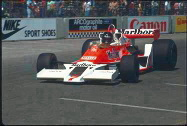

In [36]:
from IPython.display import Image
img = cv2.imread('2712.jpg')
width, height, channels = img.shape
Image('2712.jpg')

# Texture Orientation Detection

In [37]:
CSA = 64
CSB = 18
arr = np.zeros(3*width*height).reshape(width,height,3)
ori = np.zeros(width * height).reshape(width, height)
ori

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
gxx = gyy = gxy = 0.0
rh = gh = bh = 0.0
rv = gv = bv = 0.0
theta = np.zeros(width*height).reshape(width,height)

for i in range(1, width-1):
    for j in range(1, height-1):
        rh=arr[i-1,j+1,0] + 2*arr[i,j + 1,0] + arr[i+1, j+1,0] - (arr[i-1, j - 1, 0] + 2 * arr[i,j-1, 0] + arr[i + 1, j - 1, 0])
        gh=arr[i-1,j+1,1] + 2*arr[i,j + 1,1] + arr[i+ 1,j+1,1] - (arr[i-1, j - 1, 1] + 2 * arr[i,j-1, 1] + arr[i + 1, j - 1, 1])
        bh=arr[i-1,j+1,2] + 2*arr[i,j + 1,2] + arr[i+ 1,j+1,2] - (arr[i-1, j - 1, 2] + 2 * arr[i,j-1, 2] + arr[i + 1, j - 1, 2])
        rv=arr[i+1,j-1,0] + 2*arr[i+1, j, 0] + arr[i+ 1,j+1,0] - (arr[i-1, j - 1, 0] + 2 * arr[i-1,j, 0] + arr[i - 1, j + 1, 0])
        gv=arr[i+1,j-1,1] + 2*arr[i+1, j, 1] + arr[i+ 1,j+1,1] - (arr[i-1, j - 1, 1] + 2 * arr[i-1,j, 1] + arr[i - 1, j + 1, 1])
        bv=arr[i+1,j-1,2] + 2*arr[i+1, j, 2] + arr[i+ 1,j+1,2] - (arr[i-1, j - 1, 2] + 2 * arr[i-1,j, 2] + arr[i - 1, j + 1, 2])
        
        gxx = math.sqrt(rh * rh + gh * gh + bh * bh)
        gyy = math.sqrt(rv * rv + gv * gv + bv * bv)
        gxy = rh * rv + gh * gv + bh * bv
        
        theta[i,j] = (math.acos(gxy / (gxx * gyy + 0.0001))*180 / math.pi)

ImageX = np.zeros(width * height).reshape(width, height)
theta

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  90.,  90., ...,  90.,  90.,   0.],
       [  0.,  90.,  90., ...,  90.,  90.,   0.],
       ..., 
       [  0.,  90.,  90., ...,  90.,  90.,   0.],
       [  0.,  90.,  90., ...,  90.,  90.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

# Color Quantization in RGB Color Space

In [39]:
R = G = B = 0
VI = SI = HI = 0
BC,GC,RC = cv2.split(img)
for i in range(0, width):
    for j in range(0, height):
        R = RC[i][j]
        G = GC[i][j]
        B = BC[i][j]
        
        if (R >=0 and R <= 64):
            VI = 0;
        if (R >= 65 and R <= 128):
            VI = 1;
        if (R >= 129 and R <= 192):
            VI = 2;
        if (R >= 193 and R <= 255):
            VI = 3;
        if (G>= 0 and G <= 64):
            SI = 0;
        if (G >= 65 and G <= 128):
            SI = 1;
        if (G >= 129 and G <= 192):
            SI = 2;
        if (G >= 193 and G <= 255):
            SI = 3;
        if (B >= 0 and B <= 64):
            HI = 0;
        if (B >= 65 and B <= 128):
            HI = 1;
        if (B >= 129 and B <= 192):
            HI = 2;
        if (B >= 193 and B <= 255):
            HI = 3;
        
        ImageX[i, j] = 16 * VI + 4 * SI + HI;
ImageX
cv2.imshow('ImageX',ImageX)
cv2.waitKey(0)



-1

In [40]:
for i in range(0, width):
    for j in range(0, height):
        ori[i,j] = round(theta[i,j]*CSB/180)
        
        if(ori[i,j]>=CSB-1):
            ori[i,j]=CSB-1
ori

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  9.,  9., ...,  9.,  9.,  0.],
       [ 0.,  9.,  9., ...,  9.,  9.,  0.],
       ..., 
       [ 0.,  9.,  9., ...,  9.,  9.,  0.],
       [ 0.,  9.,  9., ...,  9.,  9.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

# Texton Detection

In [41]:
Texton = np.zeros(width * height).reshape(width, height)

for i in range(0,(int)(width/2)):
    for j in range(0,(int)(height/2)):
        if(ImageX[2*i,2*j] == ImageX[2*i+1,2*j+1]):
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j]
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j]
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1]
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1]
        
        if (ImageX[2*i,2*j+1] == ImageX[2*i+1,2*j]):
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j]
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j]
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1]
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1]
        
        if (ImageX[2*i,2*j] == ImageX[2*i+1,2*j]): 
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j]
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j]
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1]
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1]
            
        if (ImageX[2*i,2*j] == ImageX[2*i,2*j+1]):
            Texton[2 * i, 2 * j] = ImageX[2 * i, 2 * j]
            Texton[2 * i + 1, 2 * j] = ImageX[2 * i + 1, 2 * j]
            Texton[2 * i, 2 * j + 1] = ImageX[2 * i, 2 * j + 1]
            Texton[2 * i + 1, 2 * j + 1] = ImageX[2 * i + 1, 2 * j + 1]
Texton

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   5., ...,   1.,   1.,   0.],
       [  0.,   0.,  21., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,  21.,  21.,   0.],
       [  0.,   0.,   0., ...,  21.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

# Multi-Texton Histogram

In [42]:
MatrixH = np.zeros(CSA + CSB).reshape(CSA + CSB)
MatrixV = np.zeros(CSA + CSB).reshape(CSA + CSB)
MatrixRD = np.zeros(CSA + CSB).reshape(CSA + CSB)
MatrixLD = np.zeros(CSA + CSB).reshape(CSA + CSB)

D = 1 #distance parameter

for i in range(0, width):
    for j in range(0, height-D):
        if(ori[i, j+D] == ori[i, j]):
            MatrixH[(int)(Texton[i,j])] += 1;
        if(Texton[i, j + D] == Texton[i, j]):
            MatrixH[(int)(CSA + ori[i, j])] += 1;

for i in range(0, width-D):
    for j in range(0, height):
        if(ori[i + D, j] == ori[i, j]):
            MatrixV[(int)(Texton[i,j])] += 1;
        if(Texton[i + D, j] == Texton[i, j]):
            MatrixV[(int)(CSA + ori[i, j])] += 1;

for i in range(0, width-D):
    for j in range(0, height-D):
        if(ori[i + D, j + D] == ori[i, j]):
            MatrixRD[(int)(Texton[i,j])] += 1;
        if(Texton[i + D, j + D] == Texton[i, j]):
            MatrixRD[(int)(CSA + ori[i, j])] += 1;
            
for i in range(D, width):
    for j in range(0, height-D):
        if(ori[i - D, j + D] == ori[i, j]):
            MatrixLD[(int)(Texton[i,j])] += 1;
        if(Texton[i - D, j + D] == Texton[i, j]):
            MatrixLD[(int)(CSA + ori[i, j])] += 1;
MatrixV
#MatrixH

array([  5.22200000e+03,   9.07000000e+02,   0.00000000e+00,
         0.00000000e+00,   4.50000000e+01,   5.28000000e+02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.36000000e+02,   7.80000000e+01,
         0.00000000e+00,   0.00000000e+00,   1.80000000e+02,
         1.21870000e+04,   1.72000000e+02,   0.00000000e+00,
         0.00000000e+00,   9.50000000e+01,   4.31000000e+02,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.08000000e+02,
         2.70000000e+01,   0.00000000e+00,   0.00000000e+00,
         4.90000000e+01,   2.51000000e+02,   1.60000000e+01,
         0.00000000e+00,   0.00000000e+00,   7.10000000e+01,
         9.68000000e+02,   5.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.20000000e+01,   1.20000000e+01,
         1.48000000e+02,

# Feature Vectors

In [43]:
MTH = np.zeros(CSA + CSB).reshape(CSA + CSB)

for i in range(0, CSA + CSB):
    MTH[i] = ( MatrixH[i] + MatrixV[i] + MatrixRD[i] + MatrixLD[i])/4.0;

MTH

array([  5.09650000e+03,   9.01250000e+02,   0.00000000e+00,
         0.00000000e+00,   4.45000000e+01,   5.25250000e+02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.31750000e+02,   7.67500000e+01,
         0.00000000e+00,   0.00000000e+00,   1.74250000e+02,
         1.21980000e+04,   1.71500000e+02,   0.00000000e+00,
         0.00000000e+00,   9.50000000e+01,   4.30250000e+02,
         7.50000000e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.07750000e+02,
         2.70000000e+01,   0.00000000e+00,   0.00000000e+00,
         4.82500000e+01,   2.49250000e+02,   1.60000000e+01,
         0.00000000e+00,   0.00000000e+00,   7.10000000e+01,
         9.67250000e+02,   5.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.20000000e+01,   1.20000000e+01,
         1.48000000e+02,

In [44]:
len(MTH)

82

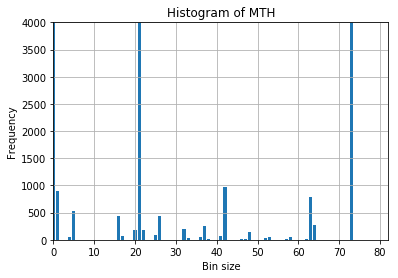

In [45]:
plt.axis([0, 82, 0, 4000])
plt.bar(np.arange(82),MTH)
plt.xlabel('Bin size')
plt.ylabel('Frequency')
plt.title('Histogram of MTH')
plt.grid(True)

plt.show()

In [94]:
[  4.57400000e+03,   5.57000000e+02,   0.00000000e+00,
         0.00000000e+00,   4.77500000e+01,   5.34250000e+02,
         1.30000000e+01,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   5.64250000e+02,   1.17500000e+02,
         0.00000000e+00,   0.00000000e+00,   2.87000000e+02,
         1.25357500e+04,   1.30000000e+02,   0.00000000e+00,
         0.00000000e+00,   6.62500000e+01,   3.55750000e+02,
         3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   6.57500000e+01,
         1.20000000e+01,   0.00000000e+00,   0.00000000e+00,
         9.40000000e+01,   3.33250000e+02,   2.30000000e+01,
         0.00000000e+00,   0.00000000e+00,   3.87500000e+01,
         1.47325000e+03,   1.37000000e+02,   0.00000000e+00,
         0.00000000e+00,   1.70000000e+01,   2.90000000e+01,
         1.15000000e+02,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   2.40000000e+01,   6.27500000e+01,
         2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.10000000e+01,   6.40000000e+01,   2.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.90000000e+01,
         5.42000000e+02,   2.59250000e+02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.63395000e+04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00]

In [ ]:
[  5.09650000e+03,   9.01250000e+02,   0.00000000e+00,
         0.00000000e+00,   4.45000000e+01,   5.25250000e+02,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.31750000e+02,   7.67500000e+01,
         0.00000000e+00,   0.00000000e+00,   1.74250000e+02,
         1.21980000e+04,   1.71500000e+02,   0.00000000e+00,
         0.00000000e+00,   9.50000000e+01,   4.30250000e+02,
         7.50000000e-01,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.07750000e+02,
         2.70000000e+01,   0.00000000e+00,   0.00000000e+00,
         4.82500000e+01,   2.49250000e+02,   1.60000000e+01,
         0.00000000e+00,   0.00000000e+00,   7.10000000e+01,
         9.67250000e+02,   5.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.20000000e+01,   1.20000000e+01,
         1.48000000e+02,   3.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   3.40000000e+01,   4.80000000e+01,
         2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         6.00000000e+00,   5.20000000e+01,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.70000000e+01,
         7.94000000e+02,   2.80000000e+02,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.66640000e+04,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00]